In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create training dataset by loading images from directory
train_ds = keras.preprocessing.image_dataset_from_directory(
    "dataset/train",
    validation_split=None,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Create validation dataset by loading images from directory
val_ds = keras.preprocessing.image_dataset_from_directory(
    "dataset/validation",
    validation_split=None,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)



# Optimize dataset performance by caching and prefetching
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Build the model by stacking layers
base_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model to remove training on pre-trained layers
base_model.trainable = False

# Create new model on top of base model
model = keras.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

# Compile the model by specifying optimizer, loss, and metrics
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

model.evaluate(val_ds)

import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image for prediction
img = image.load_img("example.png", target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make prediction on the image
pred = model.predict(img_array)
class_index = np.argmax(pred)
class_index


Found 276 files belonging to 5 classes.


Found 50 files belonging to 5 classes.
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 560ms/step - accuracy: 0.3080 - loss: 1.7066 - val_accuracy: 0.3600 - val_loss: 1.4633
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.3804 - loss: 1.4503 - val_accuracy: 0.4600 - val_loss: 1.3935
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.4855 - loss: 1.2471 - val_accuracy: 0.4600 - val_loss: 1.3270
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.5471 - loss: 1.1603 - val_accuracy: 0.5400 - val_loss: 1.2524
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.5942 - loss: 1.0606 - val_accuracy: 0.5200 - val_loss: 1.2062
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 485ms/step - accuracy: 0.6051 - loss: 1.0040 - val_accuracy: 0.5800 - val_loss: 1.1321
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 427ms/step - accuracy: 0.6522 - loss: 0.9375 - val_accuracy: 0.5600 - val_loss: 1.1441
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 459ms/step - accuracy: 0.6558 - loss: 0.

np.int64(0)

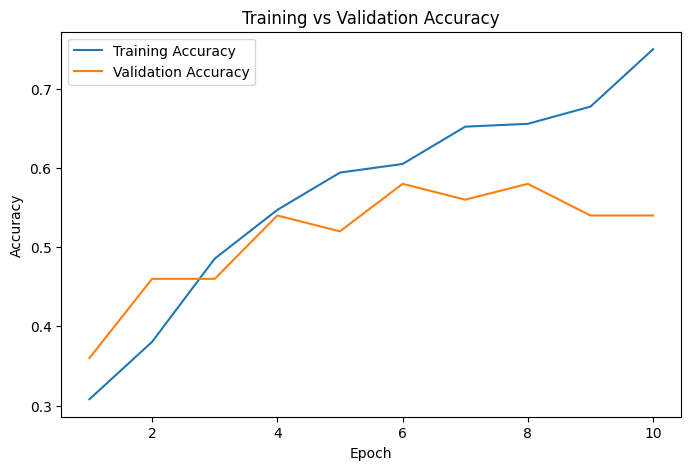

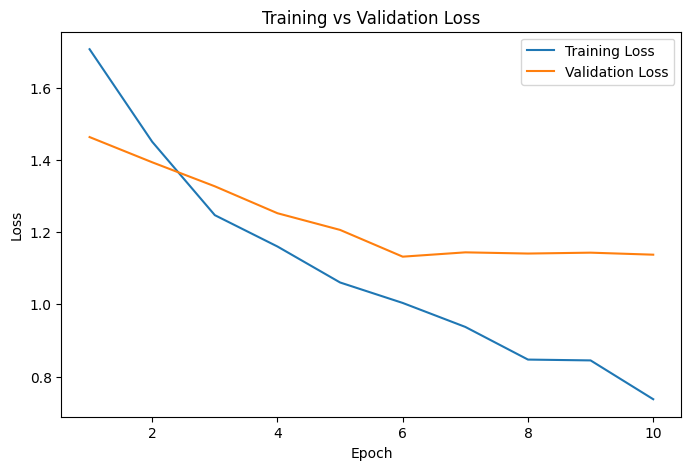

In [39]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


The dataset is comprised of 276 training images and 50 validation images of 5 different types of World War 2 ships. The images are taken from various angles and distances, and the ships are in different lighting conditions. The dataset is small, but it is a good starting point for training a simple image classification model. Give random selection of classifications the accuracy would be around 20%. Our goal is to get the accuracy as high as possible above that baseline. One of the largest problems with classification models is overfitting. Overfitting occurs when the model learns to memorize the training data instead of learning to generalize from it. This can lead to poor performance on new data that the model has not seen before. Out goal is to create a model that can generalize well from the training data and perform well on new data.

The ships we types we are trying to classify are:
- Battleship

<img src="dataset/validation/battleships+battlecruisers/Alabama.jpg" width="200">

- Carrier

<img src="dataset/validation/carriers/Akagi.jpg" width="200">

- Cruiser

<img src="dataset/validation/cruisers/Admiral_Scheer.jpg" width="200">

- Destroyer

<img src="dataset/validation/destroyers/Arashio.jpg" width="200">

- Submarine

<img src="dataset/validation/submarines/Albacore.jpg" width="200">

With initial testing of the sequential model on the data proved to create a very low accuracy of around 38% with new images the model had not seen before. But the model had a very high accuracy of around 96% on the training data. In this case that meant that the model was overfitting the training. The model was memorizing the training data instead of learning to generalize from it. 

Here is a snippet of the code used to create the model:

```python
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    # layers.Dense(train_ds.cardinality().numpy(), activation='softmax')  
    layers.Dense(5, activation='softmax') 
])
```

<img src="markdown_images/image_1.png" width="350">


<img src="markdown_images/image_2.png" width="350">

Above we can see that the training accuracy is very high while the validation accuracy is very low. This is a classic sign of overfitting. Other than that issue there are not any problems seen with the model. The loss is decreasing and the accuracy is increasing on the training data.

In an attempt to mitigate this I added random rotations, zooms, shifts and flips to the training images. This meant that the model would see a different version of the same image each time it was presented with it. This helped to increase the accuracy on new images to around 28% which is still not very good. The training accuracy also dropped to around 34% which meant that the model was no longer overfitting the training data, but there were still other overlying issues with the model.

The new code added to the model is as follows:

```python
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.2),
layers.RandomZoom(0.2),
layers.RandomContrast(0.2),
```

Images added would be randomly flipped horizontally, rotated by up to 20%, zoomed in or out by up to 20% and the contrast would be randomly adjusted by up to 20%.

Here are the reults:

<img src="markdown_images/image_3.png" width="350">

<img src="markdown_images/image_4.png" width="350">

Unfortunately the changes did not help much with the accuracy of the model. The training accuracy is still very low and the validation accuracy is even lower. The model is not learning to generalize well from the training data. While the overfitting issue has been somewhat mitigated, the model is still not performing well overall. In order to improve the model I will need to try different model architectures.

I chose to change to mobile net v2 as it is a more complex model and hass been pre-trained on a large dataset. Hopefully this will help the model to learn better features from the images and improve its accuracy.

```python
# Load MobileNetV2 model
base_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model to remove training on pre-trained layers
base_model.trainable = False

# Create new model on top of base model
model = keras.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])
```

<img src="markdown_images/image_5.png" width="350">

<img src="markdown_images/image_6.png" width="350">

Here we can see massive improvements in both training and validation accuracy. The training accuracy is now around 95% and the validation accuracy is now arround 58%. This is a huge improvement over the previous model. The model is now learning to generalize better from the training data and is performing much better on new images. Given that the model is now mostly correctly classifying the images we can try to tweek the model further to improve its accuracy even more.

The only way to improve the model further is to expand the dataset. The current dataset is very small and the model is not getting enough information to learn from. By expanding the dataset we can give the model more data to learn from and this should help to improve its accuracy even more. Hwoever, expanding the dataset requires more time and effort than what this semester allows for. Therefore, we will stop here and accept the current accuracy of the model as the best we can achieve with the given dataset and resources.

In conclusion, we were able to create a model that can classify World War 2 ships with an accuracy of around 58% on new images. This is a significant improvement over the initial model and is a good starting point for further work. The model is now learning to generalize better from the training data and is performing much better on new images. However, the model can still be improved further by expanding the dataset and using more advanced techniques.